In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.0.0'

### 导入数据

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)


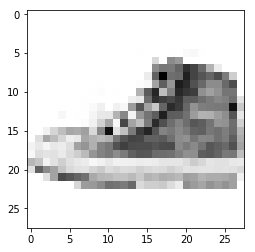

In [4]:
def show_sigle_image(img_arr):
    img_arr.reshape((28, 28))
    plt.imshow(img_arr, cmap='binary')
    plt.show()
show_sigle_image(x_train[2])

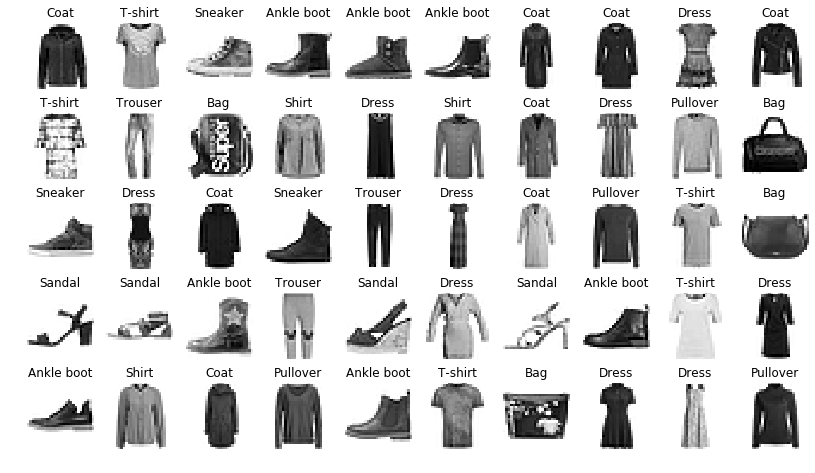

In [5]:
def show_images(n_rows, n_cols, x_data, y_data, classes_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols <= len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap = 'binary', interpolation='nearest')
            plt.axis('off')
            plt.title(classes_names[y_data[index]])
    plt.show()
classes_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_images(5, 10, x_train, y_train, classes_name)

### 搭建神经网络

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [9]:
print(model.layers)
print(model.summary())

[<tensorflow.python.keras.layers.core.Flatten object at 0xb3090d128>, <tensorflow.python.keras.layers.core.Dense object at 0xb3090d2b0>, <tensorflow.python.keras.layers.core.Dense object at 0xb3090d198>, <tensorflow.python.keras.layers.core.Dense object at 0xb3092c470>]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________

In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
13568/55000 [======>.......................] - ETA: 9s - loss: 7.1082 - accuracy: 0.7123

KeyboardInterrupt: 

In [65]:
history.history

{'loss': [2.337581914065101,
  0.6190310002066872,
  0.5350233489253304,
  0.4770827785838734,
  0.4292266435233029,
  0.40397786980759015,
  0.3924474004442042,
  0.37827455434365703,
  0.3624034856091846,
  0.35237652214440435],
 'accuracy': [0.7191455,
  0.77574545,
  0.8009818,
  0.825,
  0.8449091,
  0.8556909,
  0.8591091,
  0.86425453,
  0.8703091,
  0.8721455],
 'val_loss': [0.6718694480895996,
  0.599641717004776,
  0.47750839211940765,
  0.41593880534172056,
  0.41183310869932177,
  0.3758792862415314,
  0.4234676347613335,
  0.4575796549797058,
  0.40023341937065127,
  0.4055892984032631],
 'val_accuracy': [0.7678,
  0.7726,
  0.8292,
  0.852,
  0.8578,
  0.8644,
  0.8602,
  0.8642,
  0.872,
  0.8666]}

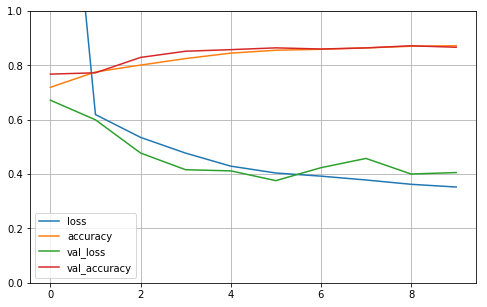

In [66]:
def plot_result(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()
plot_result(history)

### 数据归一化

In [67]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

### 回调函数

In [71]:
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
out_put_model = os.path.join(logdir, 'save_model.h5')
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(out_put_model, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 153us/sample - loss: 0.3444 - accuracy: 0.8769 - val_loss: 0.4189 - val_accuracy: 0.8654
Epoch 2/10
55000/55000 [==============================] - 9s 155us/sample - loss: 0.3371 - accuracy: 0.8780 - val_loss: 0.4427 - val_accuracy: 0.8600
Epoch 3/10
55000/55000 [==============================] - 8s 146us/sample - loss: 0.3300 - accuracy: 0.8819 - val_loss: 0.3927 - val_accuracy: 0.8810
Epoch 4/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.3241 - accuracy: 0.8843 - val_loss: 0.3777 - val_accuracy: 0.8712
Epoch 5/10
55000/55000 [==============================] - 8s 144us/sample - loss: 0.3195 - accuracy: 0.8847 - val_loss: 0.4121 - val_accuracy: 0.8788
Epoch 6/10
55000/55000 [==============================] - 8s 142us/sample - loss: 0.3144 - accuracy: 0.8875 - val_loss: 0.3794 - val_accuracy: 0.8786
Epoch 7/10
55000/55000 [===========================